<a href="https://colab.research.google.com/github/MarianiPedro/topicos_especiais_ANN/blob/main/Forecasting_NaiveBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

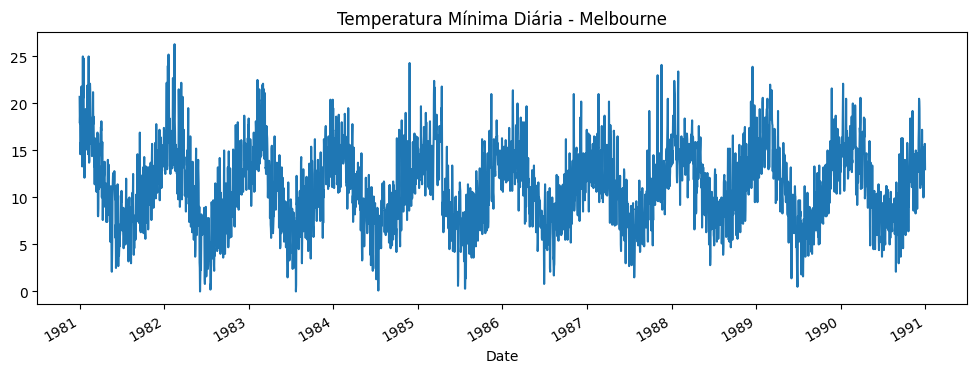

In [5]:
# === Nome ===
# Daily Minimum Temperatures in Melbourne
# === Fonte ===
# Bureau of Meteorology, Australia
# ===  Período ===
# Janeiro de 1981 a Dezembro de 1990
# ===  Frequência  ===
# Diária
# ===  Unidade ===
# Graus Celsius
# ===  Tamanho ===
# 3650 registros

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
series = df['Temp']
series.plot(figsize=(12,4), title="Temperatura Mínima Diária - Melbourne")
plt.show()

In [6]:
# n_lags            = 30    -> considerando aproximadamente 1 mês de histórico
# forecast_horizon  = 1     -> prevendo o próximo dia
def create_supervised(series, n_lags=30, forecast_horizon=1):
    X, y = [], []
    for i in range(n_lags, len(series)-forecast_horizon+1):
        X.append(series[i-n_lags:i].values)
        y.append(series[i+forecast_horizon-1])
    return np.array(X), np.array(y)

X, y = create_supervised(series, n_lags=30)
print("X shape:", X.shape, "| y shape:", y.shape)

# train_size  =  0.8   -> 20% p/ teste e 80% p/ treino
train_size = int(len(X)*0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

X shape: (3620, 30) | y shape: (3620,)


/tmp/ipython-input-6-3002360671.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(series[i+forecast_horizon-1])


In [7]:
y_pred_naive = X_test[:, -1]

y_pred_mean = X_test.mean(axis=1)

y_pred_seasonal = X_test[:, -7]  # domingo.

def evaluate(y_true, y_pred, label):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{label} — RMSE: {rmse:.3f}, MAE: {mae:.3f}")

evaluate(y_test, y_pred_naive, "Naive")
evaluate(y_test, y_pred_mean, "Mean")
evaluate(y_test, y_pred_seasonal, "Seasonal Naive")

Naive — RMSE: 2.478, MAE: 1.950
Mean — RMSE: 2.678, MAE: 2.058
Seasonal Naive — RMSE: 3.481, MAE: 2.750


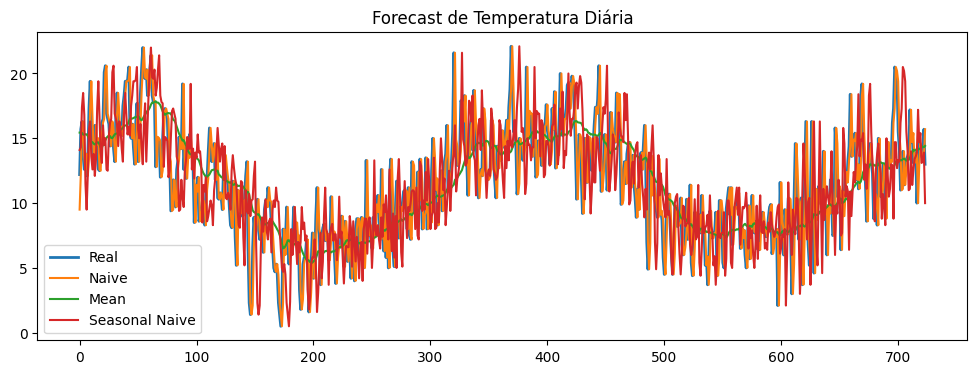

In [8]:
plt.figure(figsize=(12,4))
plt.plot(y_test, label="Real", linewidth=2)
plt.plot(y_pred_naive, label="Naive")
plt.plot(y_pred_mean, label="Mean")
plt.plot(y_pred_seasonal, label="Seasonal Naive")
plt.legend()
plt.title("Forecast de Temperatura Diária")
plt.show()